In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [ ]:
# data loading
customer_data = pd.read_csv('/content/Mall_Customers.csv')


In [ ]:
#first 5 rwos of df
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
#finding no. of rows and columns
customer_data.shape

(200, 5)

In [ ]:
#getting some info about the dataset
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
#checking for missing values
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Choosing the Annual Income & Spending Score column

In [ ]:
X= customer_data.iloc[:,[3,4]].values

In [ ]:
print(X)

To choose correct no of clusters


We use WCSS parameter: Within Cluster Sum of Squares
for correct k WCSS Value is minimum

In [ ]:
#finding WCSS values for different no of cluster
wcss = []

for i in range(1,11): # taking k = 1 to 10
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42 )
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

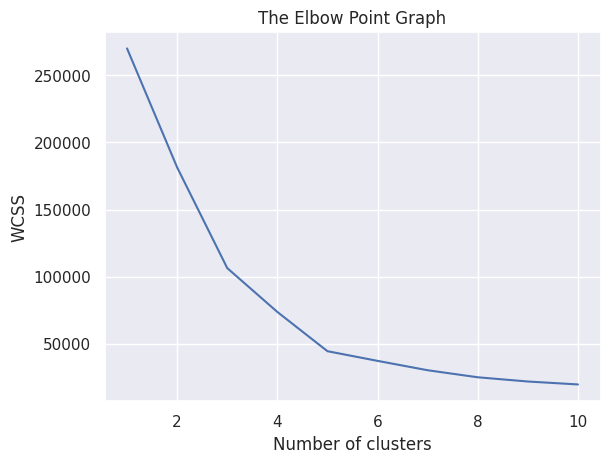

In [ ]:
#plot a elbow graph

sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

in above graph we have 2 elbow point i.e., 2 point where graph has sharp cuts at 3, 5

Optimum no of cluster will be 5

Training the K.Means Clustering Model

In [ ]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 0)

# return a label fro each data point based on their cluster
Y = kmeans.fit_predict(X)

print(Y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Visualising All the clusters

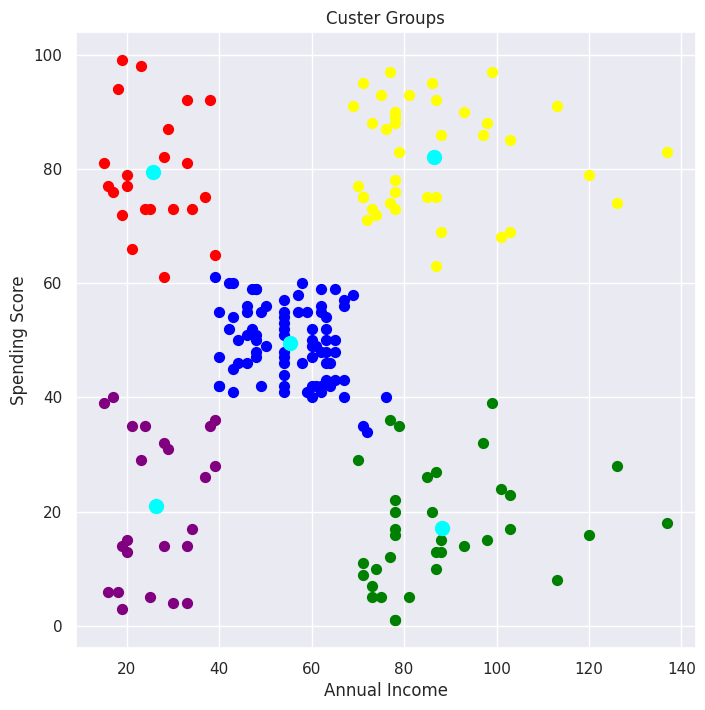

In [ ]:
#plotting all the clusters and their centroids

plt.figure(figsize = (8,8))
plt.scatter(X[Y == 0,0],X[ Y == 0,1], s= 50, c = 'green', label = 'Cluster 1')
plt.scatter(X[Y == 1,0],X[ Y == 1,1], s= 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X[Y == 2,0],X[ Y == 2,1], s= 50, c = 'yellow', label = 'Cluster 3')
plt.scatter(X[Y == 3,0],X[ Y == 3,1], s= 50, c = 'red', label = 'Cluster 4')
plt.scatter(X[Y == 4,0],X[ Y == 4,1], s= 50, c = 'purple', label = 'Cluster 5')

#to plot centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 100, c = 'cyan', label = 'centorids')

#Adding Labels to plot
plt.title('Custer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()
